In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from PIL import ImageFile

# Enable loading of truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Model selection
select_Model = {1: "MobileNetV2", 2: "resnet50", 3: "DenseNet121"}
model_name = select_Model[1]  # Change to select a model

In [14]:
# Load the trained model
model = load_model(f"vehicle_classifier_{model_name.lower()}.h5")

# Define the class mapping
index_to_class = {0: "Bus", 1: "Car", 2: "Truck", 3: "Motorcycle"}
class_names = list(index_to_class.values())

In [15]:
# Create a test data generator
base_dir = "./dataset"
img_size = (224, 224)
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 1509 images belonging to 4 classes.


In [16]:
# Get true labels and predictions
y_true = test_generator.classes

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)

# Print the evaluation results
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

y_pred = model.predict(test_generator)

y_pred_classes = np.argmax(y_pred, axis=1)

C:\Users\Imran\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/48 ━━━━━━━━━━━━━━━━━━━━ 20s 988ms/step - accuracy: 0.9550 - loss: 0.1131

C:\Users\Imran\AppData\Roaming\Python\Python310\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


48/48 ━━━━━━━━━━━━━━━━━━━━ 43s 838ms/step - accuracy: 0.9554 - loss: 0.1095
Loss: 0.08400604128837585
Accuracy: 0.9648774266242981
48/48 ━━━━━━━━━━━━━━━━━━━━ 42s 841ms/step


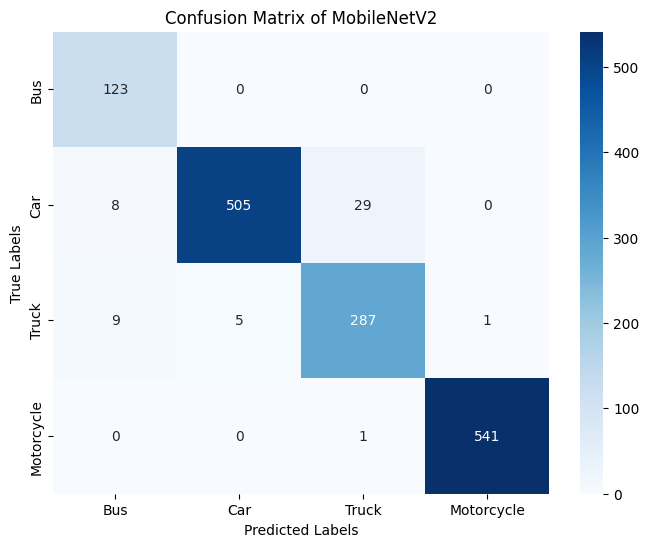

In [17]:
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix of {model_name}")
plt.show()

In [18]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

         Bus       0.88      1.00      0.94       123
         Car       0.99      0.93      0.96       542
       Truck       0.91      0.95      0.93       302
  Motorcycle       1.00      1.00      1.00       542

    accuracy                           0.96      1509
   macro avg       0.94      0.97      0.96      1509
weighted avg       0.97      0.96      0.97      1509

